#### Explore AI Academy: Final Python Project



<div style="font-size: 35px">
    <font color='Green'> <b>Avocado Data Analysis</b></font> 

<div class="alert alert-block alert-info">
<b>Note:</b> For this project, focus exclusively on the main sections marked with <b>bold and an asterisk (*)</b>. Save the rest for future machine learning tasks.
</div>

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* [9. You will learn more in Machine Learning Sprints](#chapter9)
* <b>[10. Conclusion**](#chapter10)</b>
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>




> <b> Objective of the Project:</b> The intent of this analysis is to see if any potential trends can be identified in avo sales and prices over the duration of the period. 

> <b> Data Source:</b> The data set consists of data for Avocado Prices and Sales Volumes from 2015-2023. The data was collected from the Hass Avocado Board. The product/price lookup code (PLU) uniquely identifies a product. The data sources consist of data for regions, sub-regions, and cities. The dataset consists of 12 features listed and described below in the .info() analysis. 

> <b> Importance of the Study:</b> The result of the study could help us to identify the best markets so we can change our supply strategy to ensure that we increase sales volumes and profits. We can also identify weaker markets where we could have a focused marketing approach to increase sales in these areas. 

> <b> Key Questions or Hypotheses:</b> Is there a significant difference between avo sales in the different regions?

> <b> Methodology Overview:</b> I will start by creating a data frame with the regional data I want to analyze. I will then clean the data and run an initial summary analysis. Following this I will use various charts, correlations and other statistical methods.

> <b> Expected Outcomes:</b> Some insights that can be shared with business stakeholders. 

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

You can choose to include all of this information in the introduction or distribute it across various sections. Key points to remember:

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction ....

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [32]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
    
# Displays output inline
%matplotlib inline

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `titles.csv` file. To better manipulate and analyse the `titles.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `titles_import`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
# loading dataset
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv", index_col=False)
df.head() 

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


---

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

<b>I am creating a new dataframe called region_df. This dataframe will only include the regions and will be the dataframe I will use for my analysis. 

In [3]:
# Get unique values
unique_values = df['region'].unique()

print(unique_values)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'Miami' 'Midsouth'
 'Nashville' 'NewOrleans' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'Sacramento' 'SanDiego'
 'SanFrancisco' 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast'
 'Spokane' 'StLouis' 'Syracuse' 'Tampa' 'TotalUS' 'West'
 'WestTexNewMexico' 'BirminghamMontgomery' 'PeoriaSpringfield'
 'Providence' 'Toledo' 'Wichita' 'MiamiFtLauderdale']


In [4]:
# List of regions to include in the new DataFrame
regions_to_include = ['California', 'West', 'Plains', 'SouthCentral', 'Southeast', 'Midsouth', 'GreatLakes', 'Northeast']

# Extracting the specified regions and creating a new DataFrame
region_df = df[df['region'].isin(regions_to_include)].reset_index(drop=True)

# Get unique values
unique_values = region_df['region'].unique()

print(unique_values)


['California' 'GreatLakes' 'Midsouth' 'Northeast' 'Plains' 'SouthCentral'
 'Southeast' 'West']


**Results:** Only regions are now included in the region_df data frame.

In [5]:
region_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,California
1,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,California
2,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,GreatLakes
3,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,GreatLakes
4,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,Midsouth


<b>One of the univariate analysis (non-graphical) methods is `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [6]:
## Display summary information about the DataFrame.
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7456 non-null   object 
 1   AveragePrice  7456 non-null   float64
 2   TotalVolume   7456 non-null   float64
 3   plu4046       7456 non-null   float64
 4   plu4225       7456 non-null   float64
 5   plu4770       7456 non-null   float64
 6   TotalBags     7456 non-null   float64
 7   SmallBags     5776 non-null   float64
 8   LargeBags     5776 non-null   float64
 9   XLargeBags    5776 non-null   float64
 10  type          7456 non-null   object 
 11  region        7456 non-null   object 
dtypes: float64(9), object(3)
memory usage: 699.1+ KB


**Results**  

The dataset consists of the following 12 features, all of which is in the correct data type for my analysis:
 - Date - Last day of the week (Data Type: object)
 - AveragePrice - Average selling price (Data Type: float)
 - TotalVolume - Total volume by weight in pounds (Data Type: float)
 - plu4046 - small/medium Hass Avocados (~3-5 oz) sold by weight in US pounds (Data Type: float)
 - plu4225 - large Hass Avocados (~8-10 oz) sold by weight in US pounds (Data Type: float)
 - plu4770 - extra large Hass Avocados (~10-15 oz) sold by weight in US pounds (Data Type: float)
 - TotalBags - Total number of bags: Derived by adding Small, Large and XLarge bags (Data Type: float)
 - SmallBags - Number of small bags (Data Type: float)
 - LargeBags - Number of large bags (Data Type: float)
 - XLargeBags - Number of extra large bags (Data Type: float)
 - type - conventional or organic (Data Type: object)
 - region - includes both regions and key locations which are cities or sub-regions. There is also TotalUS. (Data Type: object)


<b>I would like to convert the Date column to a Date & Time type. 

In [7]:
# Converting columns
date_column = 'Date'

region_df[date_column] = pd.to_datetime(region_df[date_column])

print(region_df.dtypes)

Date            datetime64[ns]
AveragePrice           float64
TotalVolume            float64
plu4046                float64
plu4225                float64
plu4770                float64
TotalBags              float64
SmallBags              float64
LargeBags              float64
XLargeBags             float64
type                    object
region                  object
dtype: object


<b>The .isnull() function in pandas is used to detect missing values in a DataFrame. I added .sum() to summarize missing values per column. 

In [8]:
region_df.isnull().sum()

Date               0
AveragePrice       0
TotalVolume        0
plu4046            0
plu4225            0
plu4770            0
TotalBags          0
SmallBags       1680
LargeBags       1680
XLargeBags      1680
type               0
region             0
dtype: int64

**Results** : There are null values in the SmallBags, LargeBags and XLargeBags columns. I will remove these from my analysis as they are not part of it. I will also remove plu4046, plu4225 and plu4770 columns as they will not be necessary. 

In [9]:
# Columns to drop
columns_to_drop = ['SmallBags', 'LargeBags', 'XLargeBags', "plu4046", "plu4225", "plu4770"]

# Dropping columns
region_df.drop(columns=columns_to_drop, inplace=True)  # Specify inplace=True to modify 'df' directly

region_df.head()

,Date,AveragePrice,TotalVolume,TotalBags,type,region
0,2015-01-04,0.93,5777334.90,528451.74,conventional,California
1,2015-01-04,1.24,142349.77,9144.15,organic,California
2,2015-01-04,1.02,3382800.12,537780.56,conventional,GreatLakes
3,2015-01-04,1.54,61615.10,15018.11,organic,GreatLakes
4,2015-01-04,1.10,2578275.12,510468.50,conventional,Midsouth


In [10]:
region_df.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
TotalBags       0
type            0
region          0
dtype: int64

**Result:** My dataframe has zero null values and is ready for further analysis.

<b>The duplicated() function is used to identify duplicate rows in a DataFrame. I combined the sum() function to count the number of duplicate rows.

In [11]:
region_df.duplicated().sum()

0

**Results** : There is zero duplicate rows.

<b>I am adding a new column called TotalSales that is a product of multiplying the TotalVolume column by the AveragePrice column. I am also extracting the year from the Date column. 

<b> I would like to round all float columns to 2 decimal places with the below function

In [12]:
# Adding a new column by multiplying 'AveragePrice' and 'TotalVolume'
region_df['TotalSales'] = (region_df['AveragePrice'] * region_df['TotalVolume']).round(2)

# Extract the year and create a new column 'year'
region_df['Year'] = region_df['Date'].dt.year

In [13]:
region_df.head()

,Date,AveragePrice,TotalVolume,TotalBags,type,region,TotalSales,Year
0,2015-01-04,0.93,5777334.90,528451.74,conventional,California,5372921.46,2015
1,2015-01-04,1.24,142349.77,9144.15,organic,California,176513.71,2015
2,2015-01-04,1.02,3382800.12,537780.56,conventional,GreatLakes,3450456.12,2015
3,2015-01-04,1.54,61615.10,15018.11,organic,GreatLakes,94887.25,2015
4,2015-01-04,1.10,2578275.12,510468.50,conventional,Midsouth,2836102.63,2015


In [14]:
region_df.shape

(7456, 8)

**Results** : The final regional dataset consists of 7456 rows (observations) and 8 columns (features). 

#### <a href=#cont>Back to Table of Contents</a>

---

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

In [15]:
region_df.describe().round(2)

,Date,AveragePrice,TotalVolume,TotalBags,TotalSales,Year
count,7456,7456.00,7456.00,7456.00,7456.00,7456.00
mean,2019-06-19 12:18:32.446351872,1.39,2328084.31,579142.70,2647586.78,2018.97
min,2015-01-04 00:00:00,0.62,21986.87,2485.95,39854.14,2015.00
25%,2017-03-26 00:00:00,1.11,163736.48,79081.14,262792.80,2017.00
50%,2019-06-19 12:00:00,1.37,818275.69,301307.43,1121658.89,2019.00
75%,2021-09-12 00:00:00,1.65,4505629.56,998509.29,4947537.54,2021.00
max,2023-12-03 00:00:00,2.58,11274749.11,4145406.70,10413171.25,2023.00
std,NaN,0.35,2449537.82,602277.62,2684986.70,2.57


**Results:** The Average Price of avocados over the period is 1.39 

<b> I will use the Kurtosis Analysis to see the measure of outliers present in the data and the Skew analysis to indicate how symmetrical the data is.

In [16]:
region_df.skew(numeric_only=True) 

AveragePrice    0.269276
TotalVolume     0.603994
TotalBags       1.149371
TotalSales      0.602096
Year            0.009774
dtype: float64

**Results**: The feature `AveragePrice` is fairly symmetrical, `TotalVolume` and `TotalSales` are moderately positively skewed and `TotalBags` is highly positively skewed.

In [17]:
region_df.kurtosis(numeric_only=True)

AveragePrice   -0.564927
TotalVolume    -1.062957
TotalBags       1.160703
TotalSales     -1.037036
Year           -1.223713
dtype: float64

**Results:** All features has low kurtosis values indicating a lack of outliers in each feature.

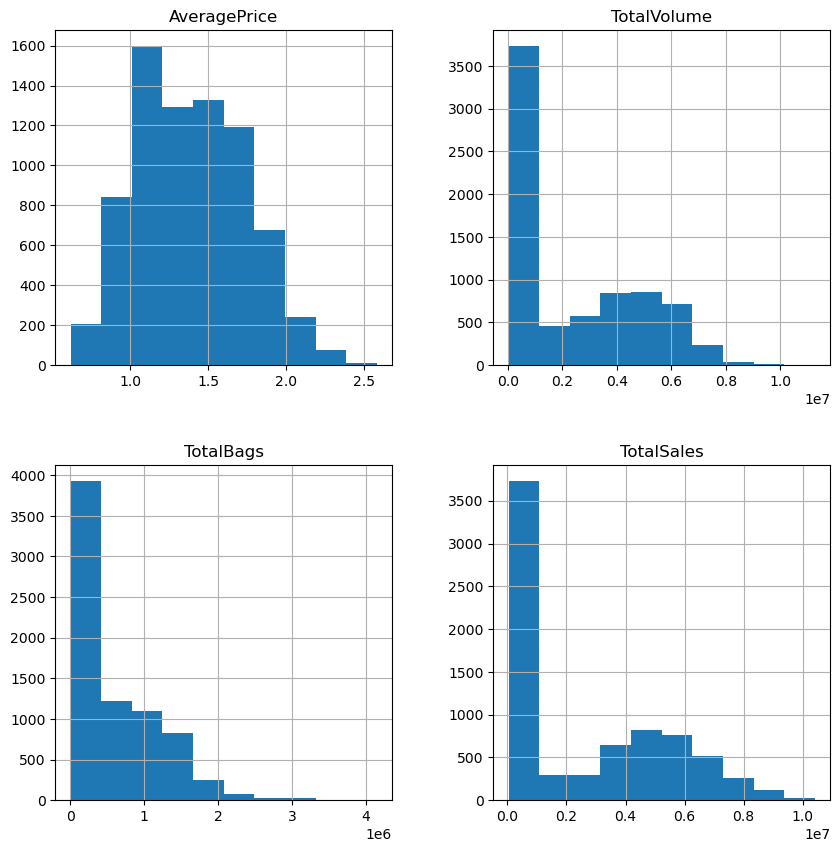

In [18]:
features = ['AveragePrice', 'TotalVolume', 'TotalBags', 'TotalSales'] # create a list of all numerical features
region_df[features].hist(figsize=(10,10));

**Results:** These histograms support the findings in the Skew and Kurtosis analysis above.

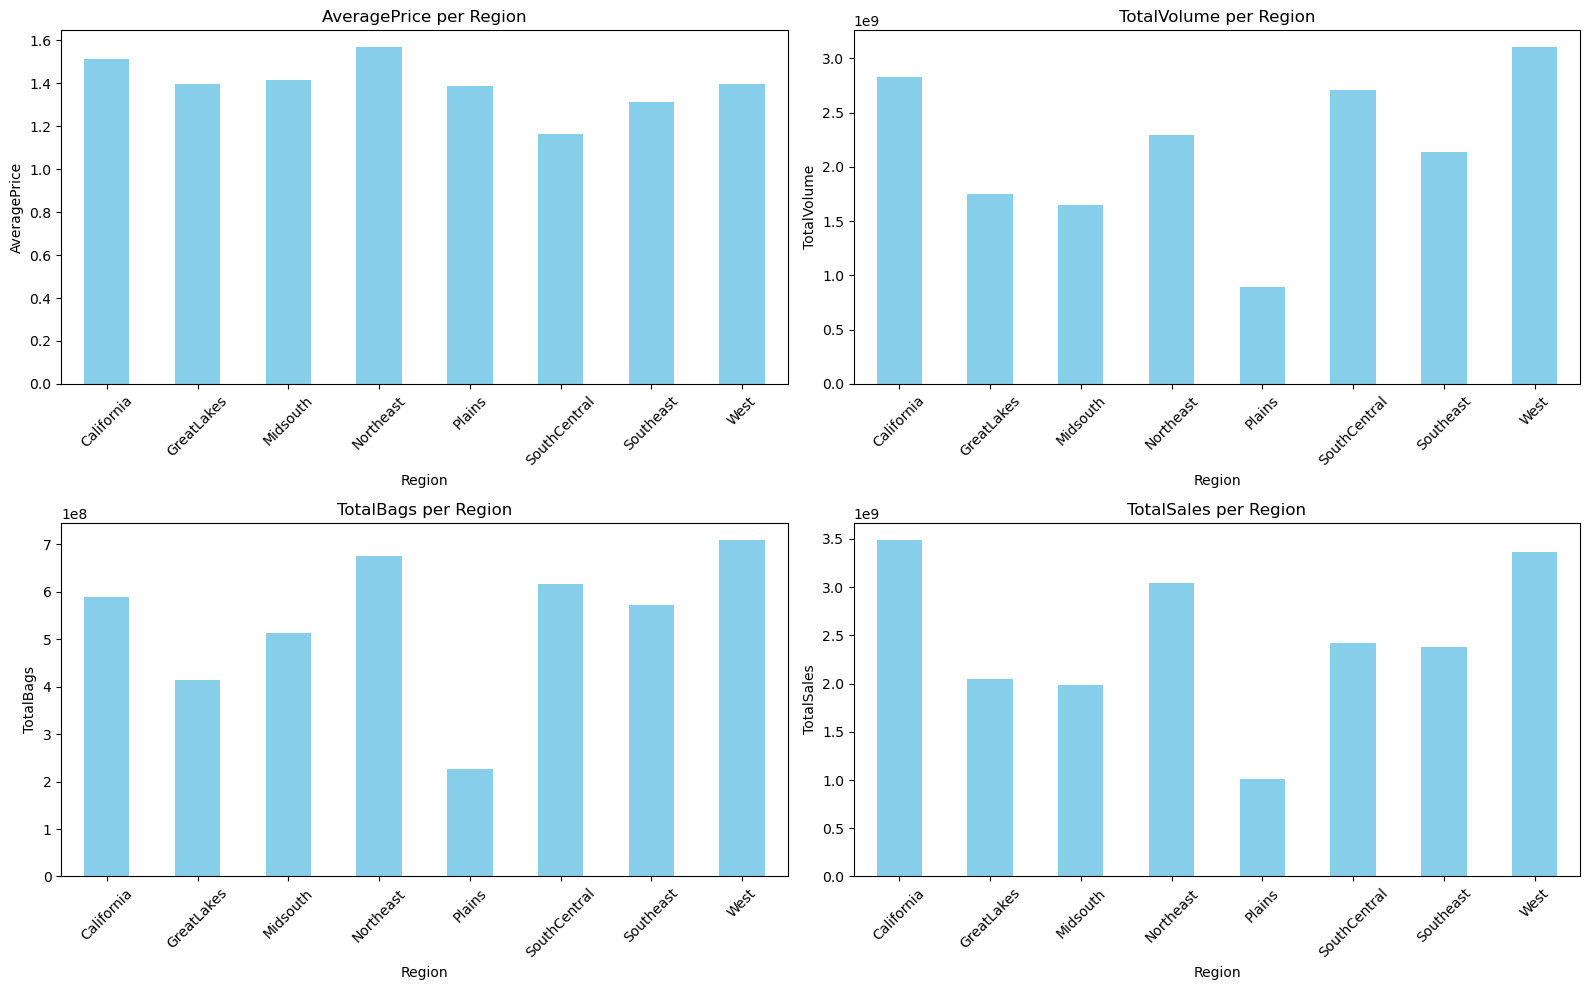

In [19]:
# Group by region and calculate mean for AveragePrice, sum for TotalVolume, TotalBags, TotalSales
metrics_region = {
    'AveragePrice': region_df.groupby('region')['AveragePrice'].mean(),
    'TotalVolume': region_df.groupby('region')['TotalVolume'].sum(),
    'TotalBags': region_df.groupby('region')['TotalBags'].sum(),
    'TotalSales': region_df.groupby('region')['TotalSales'].sum()
}

# Plot the results for each metric
plt.figure(figsize=(16, 10))
for i, (metric, data) in enumerate(metrics_region.items(), 1):
    plt.subplot(2, 2, i)
    data.plot(kind='bar', color='skyblue')
    plt.xlabel('Region')
    plt.ylabel(metric)
    plt.title(f'{metric} per Region')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Results:** 

South Central has the lowest average price and Northeast has the highest average price
Total Volume and Total Bags are the lowest in Plains and the highest in West.
Total Sales is the lowest for Plains and the highest for California. 

You can see how the higher average price of avocados in California is influencing the total sales value even though the volumes of California is less than that of West.

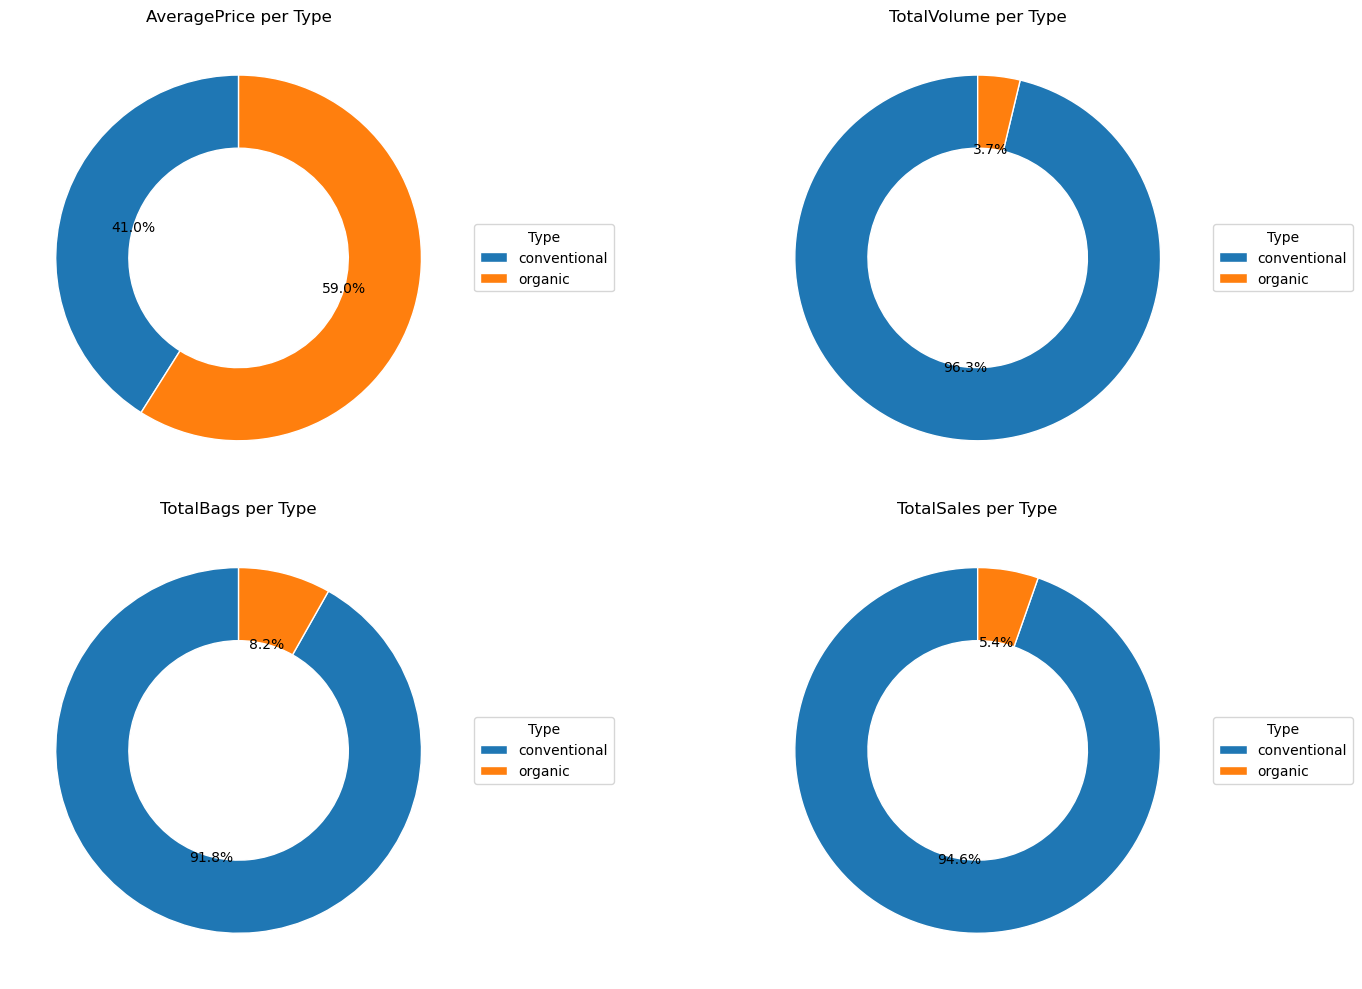

In [20]:
# Group by type and calculate the required metrics
metrics_type = {
    'AveragePrice': region_df.groupby('type')['AveragePrice'].mean(),
    'TotalVolume': region_df.groupby('type')['TotalVolume'].sum(),
    'TotalBags': region_df.groupby('type')['TotalBags'].sum(),
    'TotalSales': region_df.groupby('type')['TotalSales'].sum()
}

# Plot the results for each metric
plt.figure(figsize=(16, 10))

for i, (metric, data) in enumerate(metrics_type.items(), 1):
    plt.subplot(2, 2, i)
    wedges, texts, autotexts = plt.pie(data, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    
    for w in wedges:
        w.set_edgecolor('white')

    plt.gca().set_aspect('equal')
    plt.title(f'{metric} per Type')
    plt.legend(data.index, title="Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

**Results:** 

The average price for organic avocados is significantly higher than that of conventional avocados.
We see that SalesVolumes, TotalBags and TotalSales for conventional avocados are significantly higher than that of organic avocados.
This could potential be an opportunity to explore. We could focus efforts on growing the organic market as we can make more money through less volumes.

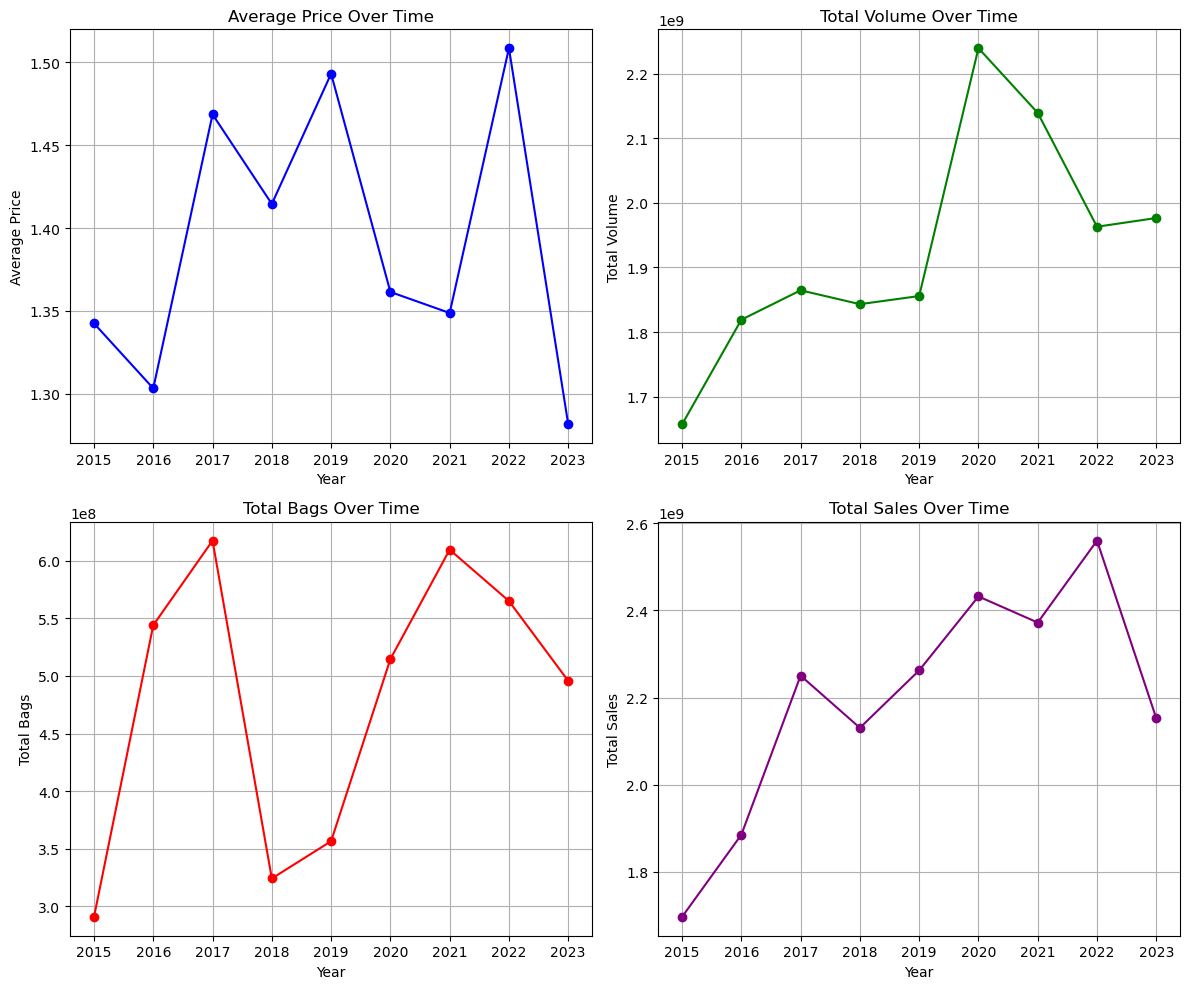

In [21]:
# Define the metrics and their corresponding colors and labels
metrics_info = {
    'AveragePrice': ('b', 'Average Price', 'Average Price Over Time'),
    'TotalVolume': ('g', 'Total Volume', 'Total Volume Over Time'),
    'TotalBags': ('r', 'Total Bags', 'Total Bags Over Time'),
    'TotalSales': ('purple', 'Total Sales', 'Total Sales Over Time')
}

# Compute the metrics
metrics = {metric: region_df.groupby('Year')[metric].agg(func) 
           for metric, func in {'AveragePrice': 'mean', 'TotalVolume': 'sum', 'TotalBags': 'sum', 'TotalSales': 'sum'}.items()}

# Plotting each metric in a separate line chart
plt.figure(figsize=(12, 10))

for i, (metric, (color, ylabel, title)) in enumerate(metrics_info.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(metrics[metric].index, metrics[metric].values, marker='o', color=color)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

plt.tight_layout()
plt.show()


**Results:**

We see an upward trend in TotalVolume and TotalSales over time.


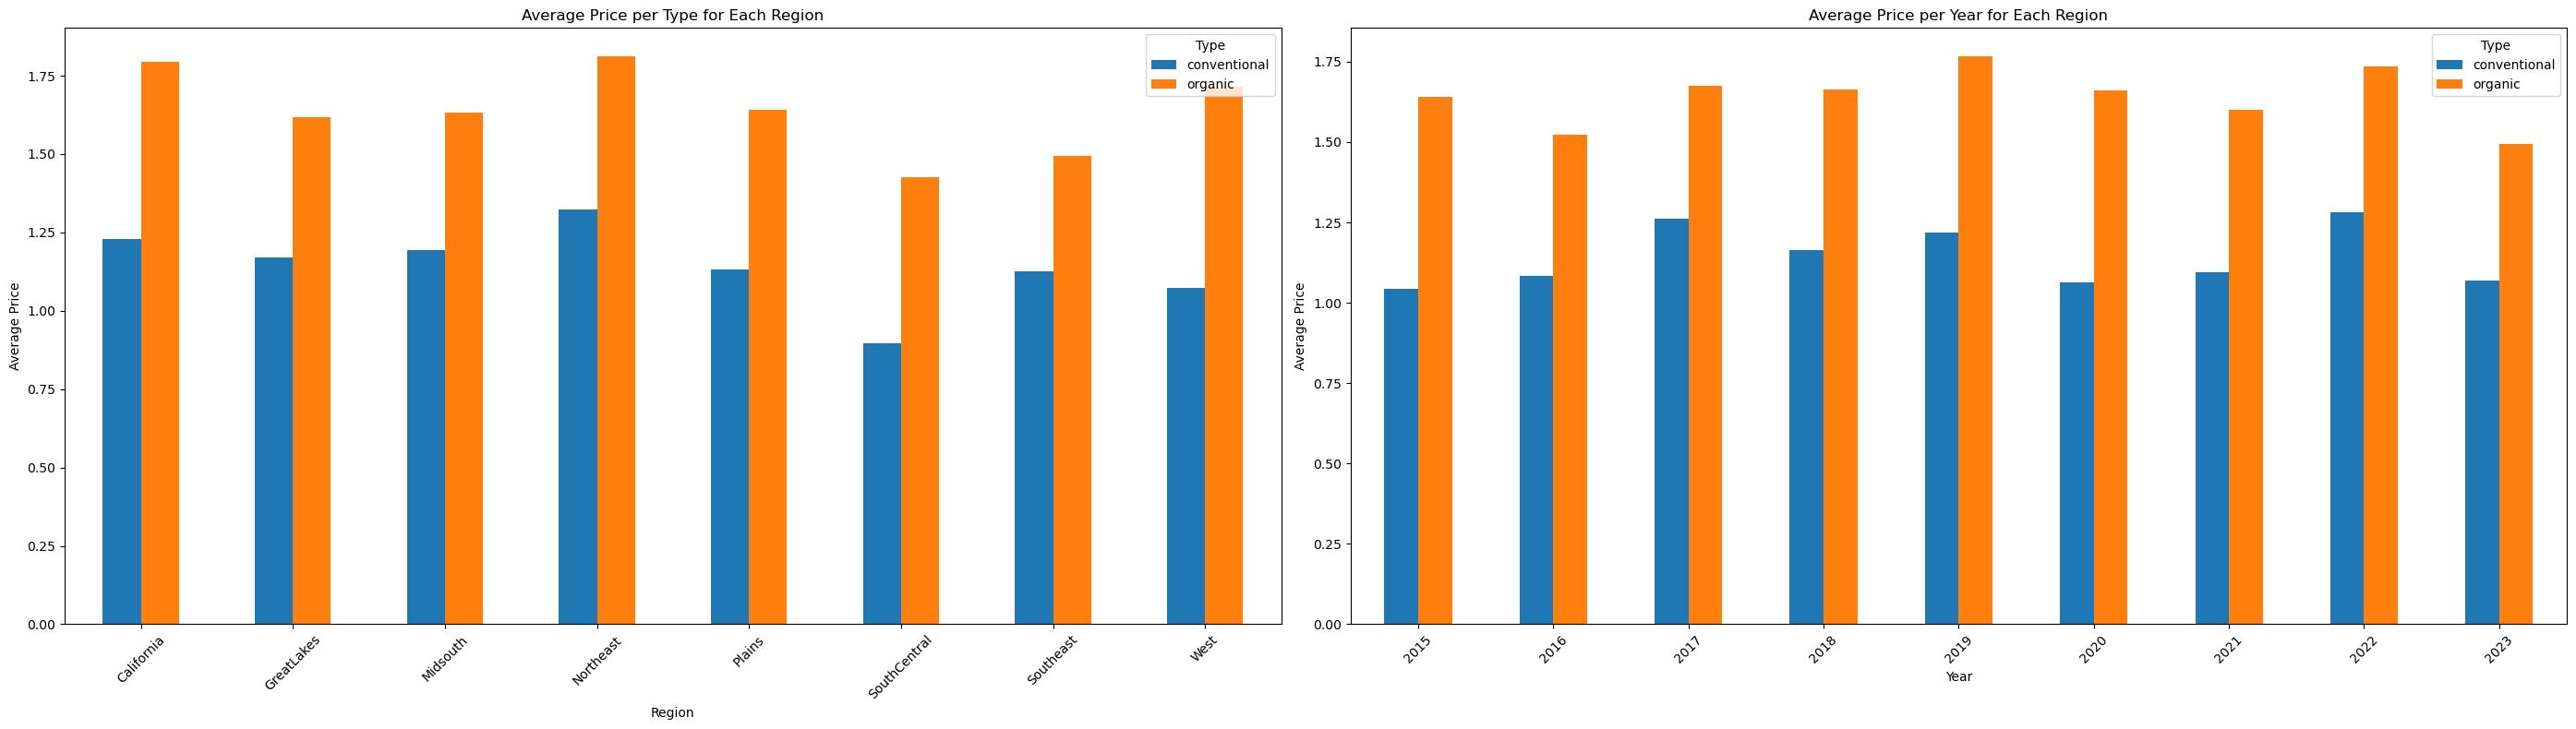

In [22]:
import matplotlib.pyplot as plt

# Calculate the average price per type for each region
average_price_per_type_region = region_df.groupby(['region', 'type'])['AveragePrice'].mean().unstack()

# Calculate the average price per type for each year
average_price_per_year_region = region_df.groupby(['Year', 'type'])['AveragePrice'].mean().unstack()

# Plot settings
plot_settings = [
    {
        'data': average_price_per_type_region,
        'xlabel': 'Region',
        'ylabel': 'Average Price',
        'title': 'Average Price per Type for Each Region'
    },
    {
        'data': average_price_per_year_region,
        'xlabel': 'Year',
        'ylabel': 'Average Price',
        'title': 'Average Price per Year for Each Region'
    }
]

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(28, 8))

# Plotting
for ax, setting in zip(axes, plot_settings):
    setting['data'].plot(kind='bar', ax=ax)
    ax.set_xlabel(setting['xlabel'])
    ax.set_ylabel(setting['ylabel'])
    ax.set_title(setting['title'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Type')

plt.tight_layout()
plt.show()


**Results:** We can see that Organic avo prices if highest in all of the regions and for all years

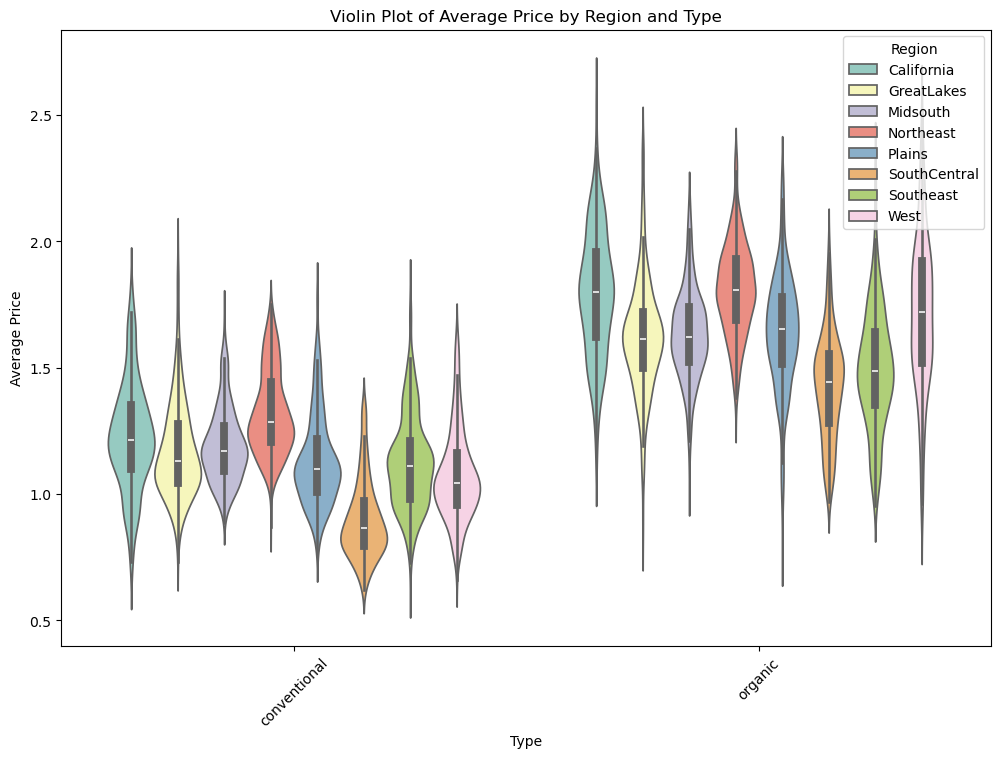

In [23]:
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='type', y='AveragePrice', hue='region', data=region_df, palette='Set3')
plt.title('Violin Plot of Average Price by Region and Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many regions
plt.legend(title='Region', loc='upper right')
plt.show()

**Results:** Some slight variation, but it seems that the distribution of average avocado prices is fairly similar across the regions for each type. 

In [24]:
region_df.corr(numeric_only=True)

,AveragePrice,TotalVolume,TotalBags,TotalSales,Year
AveragePrice,1.000000,-0.701864,-0.631956,-0.583724,0.012813
TotalVolume,-0.701864,1.000000,0.892362,0.962756,0.067677
TotalBags,-0.631956,0.892362,1.000000,0.864640,0.103029
TotalSales,-0.583724,0.962756,0.864640,1.000000,0.097007
Year,0.012813,0.067677,0.103029,0.097007,1.000000


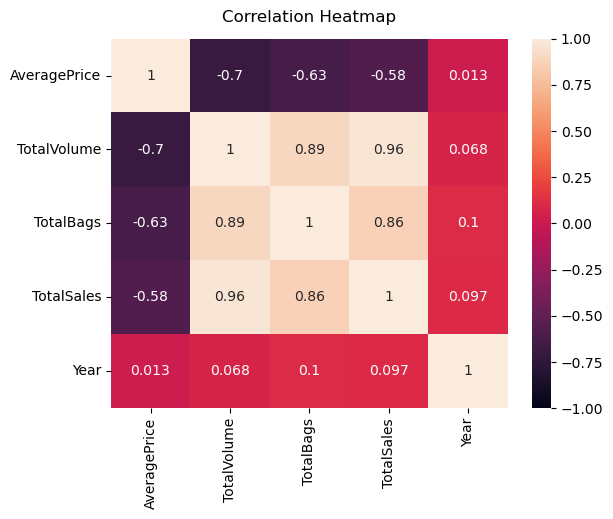

In [25]:
heatmap = sns.heatmap(region_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Results:** 

The above correlation results indicate that "AveragePrice" has a strong negative linear relationship with "TotalVolume". That is to say that as the price increases, Volume of sales will decrease and vica versa. 

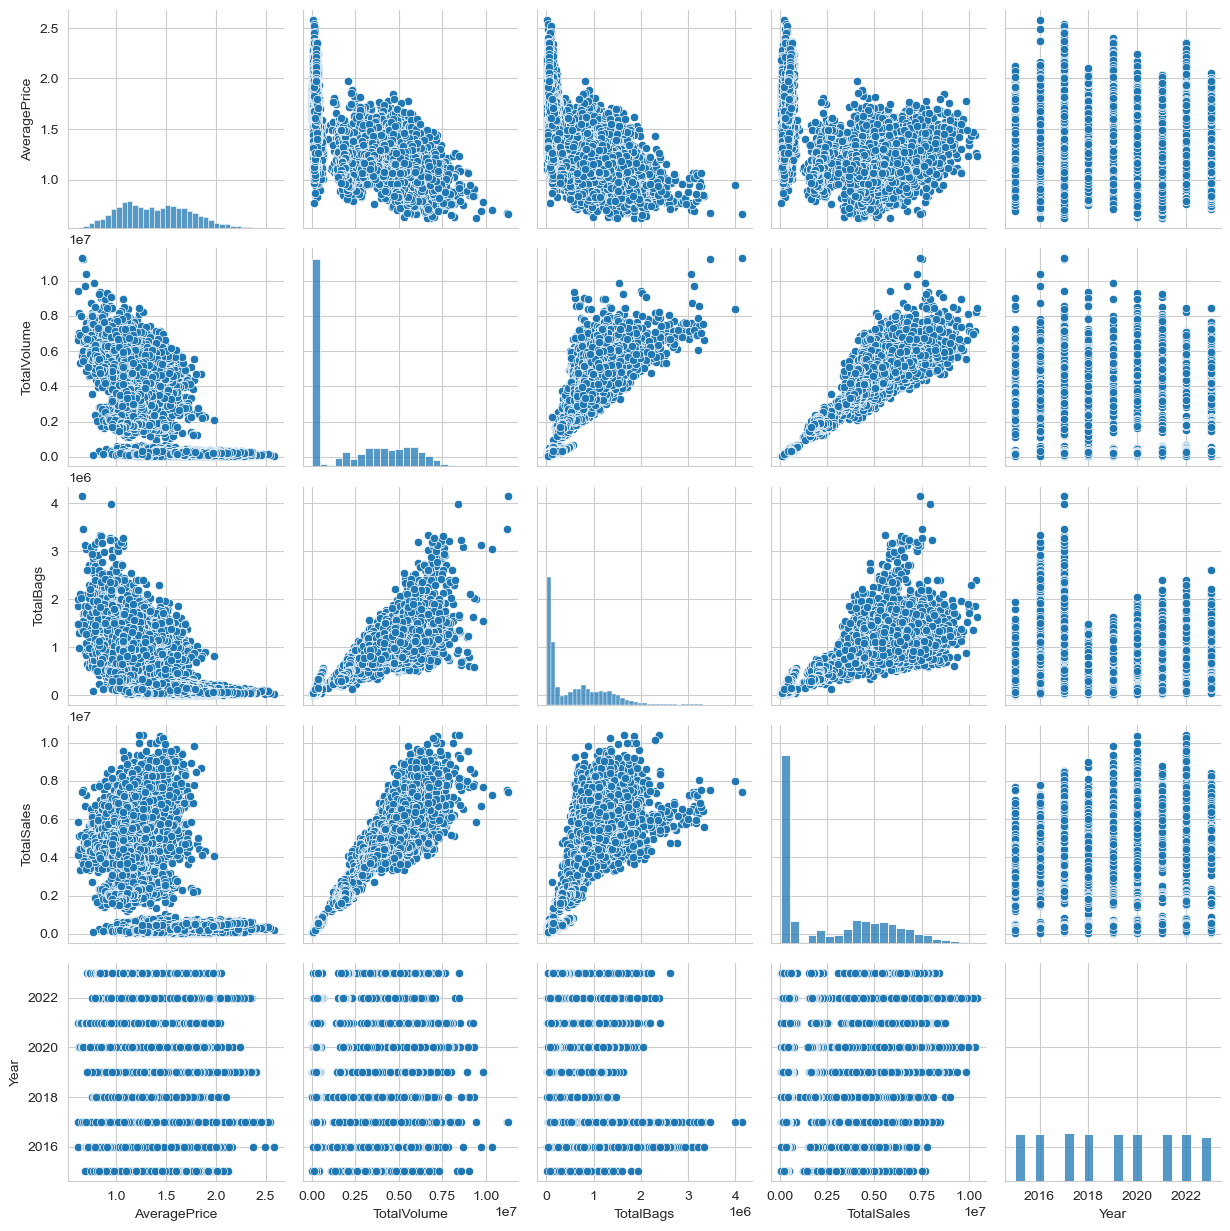

In [26]:
sns.set_style("whitegrid");
sns.pairplot(region_df);
plt.show();

In [27]:
# Group by region and calculate mean and SEM
region_stats = region_df.groupby('region')['AveragePrice'].agg(['mean', 'sem']).round(2)

# Calculate the 95% confidence interval
confidence_level = 0.95
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # For a 95% confidence interval

region_stats['ci_lower'] = (region_stats['mean'] - z_value * region_stats['sem']).round(2)
region_stats['ci_upper'] = (region_stats['mean'] + z_value * region_stats['sem']).round(2)

# Display the results
print(region_stats)

              mean   sem  ci_lower  ci_upper
region                                      
California    1.51  0.01      1.49      1.53
GreatLakes    1.39  0.01      1.37      1.41
Midsouth      1.41  0.01      1.39      1.43
Northeast     1.57  0.01      1.55      1.59
Plains        1.39  0.01      1.37      1.41
SouthCentral  1.16  0.01      1.14      1.18
Southeast     1.31  0.01      1.29      1.33
West          1.39  0.01      1.37      1.41


**Results:** With the AveragePrice feature being normally distributed around the mean, we could use these confidence intervals as an indication of price forecast for 2024.

In [28]:
# Group by region and calculate mean and SEM
region_stats = region_df.groupby('region')['TotalVolume'].agg(['mean', 'sem']).round(2)

# Calculate the 95% confidence interval
confidence_level = 0.95
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # For a 95% confidence interval

region_stats['ci_lower'] = (region_stats['mean'] - z_value * region_stats['sem']).round(2)
region_stats['ci_upper'] = (region_stats['mean'] + z_value * region_stats['sem']).round(2)

# Display the results
print(region_stats)

                    mean        sem    ci_lower    ci_upper
region                                                     
California    3037491.68   94386.33  2852497.87  3222485.49
GreatLakes    1879668.39   58864.35  1764296.38  1995040.40
Midsouth      1771624.72   54682.04  1664449.89  1878799.55
Northeast     2458167.41   76944.40  2307359.16  2608975.66
Plains         956315.97   30562.44   896414.69  1016217.25
SouthCentral  2904748.76   93249.43  2721983.24  3087514.28
Southeast     2288121.75   73503.77  2144057.01  2432186.49
West          3328535.81  103312.07  3126047.87  3531023.75


**Results:** With the TotalVolume feature not being normally distributed around the mean, we should be careful to use these confidence intervals as an indication of possible sales volumes for 2024. They could be used as an indicate value. 

In [33]:
# Function to update plot based on selected regions and types
def update_plot(selected_regions, selected_types):
    filtered_df = region_df[
        (region_df['region'].isin(selected_regions)) &
        (region_df['type'].isin(selected_types))
    ]
    total_sales_per_year = filtered_df.groupby('Year')['TotalVolume'].sum()
    
    plt.figure(figsize=(12, 8))
    total_sales_per_year.plot(kind='bar')
    plt.xlabel('Year')
    plt.ylabel('Total Volume')
    plt.title('Total Volume per Year')
    plt.xticks(rotation=45)
    plt.show()

# Get unique regions and types from the DataFrame
unique_regions = region_df['region'].unique()
unique_types = region_df['type'].unique()

# Create multi-select widgets for regions and types
region_selector = widgets.SelectMultiple(
    options=unique_regions,
    value=list(unique_regions),
    description='Regions',
    disabled=False
)

type_selector = widgets.SelectMultiple(
    options=unique_types,
    value=list(unique_types),
    description='Types',
    disabled=False
)

# Use interact to create an interactive plot
interact(update_plot, selected_regions=region_selector, selected_types=type_selector)

interactive(children=(SelectMultiple(description='Regions', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Californ…

<function __main__.update_plot(selected_regions, selected_types)>

**Results** :

Playing with the filters in above graph, one can conclude the following: 
 - Organic avo sales have increased over the years in all regions.
 - We are seeing consistent sales volumes across all regions for conventional avocados

---

#### <a href=#cont>Back to Table of Contents</a>

---

## 6. Feature Engineering (H2) <a class="anchor" id="chapter6"></a>

### 7. Modeling (H3)  <a class="anchor" id="chapter7"></a>

#### 8. Model Performance (H4)  <a class="anchor" id="chapter8"></a>

#### 9. You will learn more in Machine Learning Sprints <a class="anchor" id="chapter9"></a>

## 6. Conclusion & Insights <a class="anchor" id="chapter10"></a>

> <b> Summary of Key Findings:</b> It appears that organic avocado sales are growing year on year. A key finding is the negative linear relationship between AveragePrice and TotalVolume, it is however expected. TotalVolume and TotalSales are increasing throughout the analysis. Organic avocado prices are higher than conventional avocado prices across all regions. An opportunity exists to grow the organic market as the TotalVolume for organic avocados is very low. Plains has the lowest TotalVolume throughout the study and could potentially be a growth market.

> <b> Evaluation of the Methodology:</b> I feel the methods used in this EDA are sufficient for what the exercise represents. More detailed statistical analysis will help us to derive better insights from the data.

> <b> Implications of the Findings:</b> These outcomes can be used to give business direction in their strategic journey. New markets could be explored and growth strategies can be defined. Some forecasting could also be done. 

> <b> Suggestions for Future Work:</b> We could add normality tests, hypothesis tests, ANOVA's and other statistical and graphical techniques.

> <b> Reflection on the Data Source and Quality:</b> I have no reason to question the quality of the data in the analysis.

> <b>Concluding Thoughts:</b> Let's get into machine learning...

#### <a href=#cont>Back to Table of Contents</a>

---

## 11. References <a class="anchor" id="chapter11"></a>

Maintaining clear and organized documentation is crucial for reproducibility and credibility. Harvard referencing, a widely recognized citation style, can be effectively applied to data science notebooks to ensure proper acknowledgment of sources and facilitate the tracing of data and methodologies back to their origins.

#### <a href=#cont>Back to Table of Contents</a>

---